# Q-1

Create a logistic regression model and measure the performance of it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,roc_curve
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.utils import resample
import warnings
warnings.filterwarnings(action="ignore")

pd.options.display.max_columns = None


In [2]:
cleveland=pd.read_csv('cleveland.dat',header=None,sep=",", engine='python')
cleveland.columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope",
                   "ca","thal","num"]

cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [3]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


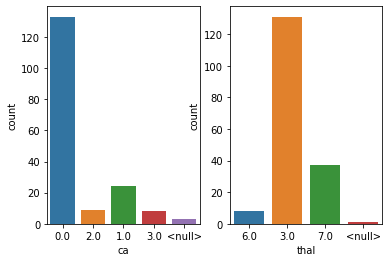

In [4]:
plt.subplot(1,2,1)
sns.countplot(cleveland.ca)

plt.subplot(1,2,2)
sns.countplot(cleveland.thal);

In [5]:
cleveland.ca=cleveland.ca.replace("<null>", float(cleveland.ca.mode()))
cleveland.ca=cleveland.ca.astype("float")


cleveland.thal=cleveland.thal.replace("<null>", float(cleveland.ca.mode()))
cleveland.thal=cleveland.thal.astype("float")

cleveland["num"]=pd.get_dummies(cleveland["num"], drop_first=True)

In [6]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    float64
 12  thal      177 non-null    float64
 13  num       177 non-null    uint8  
dtypes: float64(13), uint8(1)
memory usage: 18.3 KB


Possitive  ratio : %7.34
Negative ratio     : %92.66


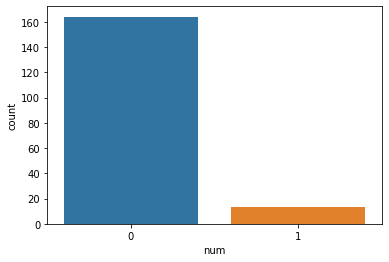

In [7]:
sns.countplot(cleveland.num)

print("Possitive  ratio : %{:.2f}".format(sum(cleveland.num)/len(cleveland.num)*100))
print("Negative ratio     : %{:.2f}".format((len(cleveland.num)-sum(cleveland.num))/len(cleveland.num)*100))

In [8]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    pred_train = log_reg.predict(X_train)
    pred_test = log_reg.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    
    print("Accuracy : {}\n".format(log_reg.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    print("*********************************************")
    
    print("The number of observations in training set is {}".format(X_train.shape[0]))
    print("The number of observations in test set is {}".format(X_test.shape[0]))
    
    print("*********************************************")

    print("Confusion Matrix Train Data\n",conf_mtx_train,"\n","**************************")
    print("Confusion Matrix Test Data \n",conf_mtx_test)
    return  None

In [9]:
X = cleveland.drop("num",axis=1)
Y = cleveland["num"]

create_model(X,Y)

Accuracy : 0.9166666666666666

Train Dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       131
           1       0.89      0.80      0.84        10

    accuracy                           0.98       141
   macro avg       0.94      0.90      0.92       141
weighted avg       0.98      0.98      0.98       141

Test Dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.50      0.33      0.40         3

    accuracy                           0.92        36
   macro avg       0.72      0.65      0.68        36
weighted avg       0.90      0.92      0.91        36

*********************************************
The number of observations in training set is 141
The number of observations in test set is 36
*********************************************
Confusion Matrix Train Data
 [[130   1]
 [  2   8]] 
 **************************
Confusion Matrix Tes

Confusion Matrix

First cell in data: Which is actually not negative and predicted to be negative. 0-0

Second cell in data: Which is actually negative but predicted to be pozitive.0-1

Third cell in data: Which is actually pozitive but predicted to be negative.1-0

Forth cell in data: Which is actually pozitive and predicted to be pozitive. 1-1

# Q-2

By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [10]:
def create_model_(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    pred_train = log_reg.predict(X_train)
    pred_test = log_reg.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    
    print("Accuracy : {}\n".format(log_reg.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return None

#  ------Up-Sampling------

In [11]:
negative = cleveland[cleveland.num == 0]
positive = cleveland[cleveland.num == 1]

neg_poz_unsampled = resample(positive,
                                         replace = True,
                                         n_samples = len(negative),
                                         random_state = 111)

upsampled_df = pd.concat([negative, neg_poz_unsampled])
upsampled_df.num.value_counts()

1    164
0    164
Name: num, dtype: int64

In [12]:
X = upsampled_df.drop("num",axis=1)
y=upsampled_df["num"]

create_model_(X,y)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



# -----SMOTE-----

In [13]:
#pip install -U imbalanced-learn

In [14]:
from imblearn.over_sampling import SMOTE


In [15]:
y = cleveland.num
X = cleveland.drop('num', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [16]:
create_model_(X_smote, y_smote)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       131
           1       0.96      1.00      0.98       131

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



# -----ADASYN-----

In [17]:
from imblearn.over_sampling import ADASYN

In [18]:
y =cleveland.num
X = cleveland.drop('num', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [19]:
create_model_(X_adasyn,y_adasyn)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       132

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



The f1 results in test dataset are close to each other. Best results Smote and Up-Sampling